In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


## Problem statment

In [2]:
# Finding the classification of three diffrent part of flower by using feature:

# 1.sepal length
# 2.sepal width
# 3.petal length
# 4.petal width

## Data Gathering

In [3]:
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## EDA

In [4]:
df=df.drop("Id",axis=1)
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<AxesSubplot:>

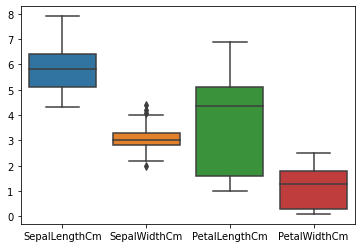

In [6]:
sns.boxplot(data=df)

<AxesSubplot:>

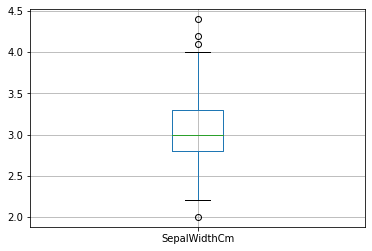

In [7]:
df[['SepalWidthCm']].boxplot()

In [8]:
## boxplot showing some outlier but actually it is not outlier 

## Seperating independent and dependent variable

In [9]:
x=df.drop('Species',axis=1)
y=df['Species']

## Train test split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=24,test_size=0.2,stratify=y)

## model training

In [11]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

## model evalution on testing data

In [12]:
y_pred=knn.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix : \n",cnf_matrix)

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy is: \n",accuracy)

clf_report=classification_report(y_test,y_pred)
print("Classification Report : \n",clf_report)

Confusion Matrix : 
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
Accuracy is: 
 0.9666666666666667
Classification Report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [13]:
y_pre=knn.predict(x_train)

cnf_matrix=confusion_matrix(y_train,y_pre)
print("Confusion Matrix : \n",cnf_matrix)

accuracy=accuracy_score(y_train,y_pre)
print("Accuracy is: \n",accuracy)

clf_report=classification_report(y_train,y_pre)
print("Classification Report : \n",clf_report)

Confusion Matrix : 
 [[40  0  0]
 [ 0 38  2]
 [ 0  2 38]]
Accuracy is: 
 0.9666666666666667
Classification Report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.95      0.95      0.95        40
 Iris-virginica       0.95      0.95      0.95        40

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.97      0.97      0.97       120



In [14]:
## model gives very good accuracy on training as well as test data 

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

<AxesSubplot:>

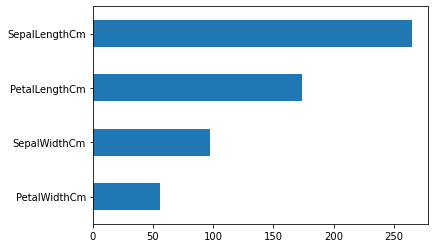

In [17]:
vif=[]
for i in range(x.shape[1]):
    v=variance_inflation_factor(x.to_numpy(),i)
    vif.append(v)
    
series=pd.Series(vif,index=x.columns)
series.sort_values().plot(kind="barh")

In [ ]:
## output variable already categorical >> assumption satiesfied

## Hypertunning

In [26]:
knn=KNeighborsClassifier()

param_grid={"n_neighbors":np.arange(1,40,1),
           "p":[1,2]}
grid_model=GridSearchCV(knn,param_grid=param_grid,cv=5)
grid_model.fit(x_train,y_train)
grid_model.best_estimator_

KNeighborsClassifier(n_neighbors=13)

In [29]:
## testing data evalution
knnf=grid_model.best_estimator_

y_pred=knnf.predict(x_test)

cnf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix : \n",cnf_matrix)

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy is: \n",accuracy)

clf_report=classification_report(y_test,y_pred)
print("Classification Report : \n",clf_report)

Confusion Matrix : 
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
Accuracy is: 
 0.9666666666666667
Classification Report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [30]:
## training data evalution

y_pre=knnf.predict(x_train)

cnf_matrix=confusion_matrix(y_train,y_pre)
print("Confusion Matrix : \n",cnf_matrix)

accuracy=accuracy_score(y_train,y_pre)
print("Accuracy is: \n",accuracy)

clf_report=classification_report(y_train,y_pre)
print("Classification Report : \n",clf_report)

Confusion Matrix : 
 [[40  0  0]
 [ 0 39  1]
 [ 0  1 39]]
Accuracy is: 
 0.9833333333333333
Classification Report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.97      0.97      0.97        40
 Iris-virginica       0.97      0.97      0.97        40

       accuracy                           0.98       120
      macro avg       0.98      0.98      0.98       120
   weighted avg       0.98      0.98      0.98       120



In [ ]:
## so by hypertunning we will get increased training accuracy by almost 2 % .
# we will adopt hypertuned model 

## Testing on single row

In [31]:
df.head(1).T

,0
SepalLengthCm,5.1
SepalWidthCm,3.5
PetalLengthCm,1.4
PetalWidthCm,0.2
Species,Iris-setosa


In [35]:
SepalLengthCm=4.6
SepalWidthCm=3.7
PetalLengthCm=1.8
PetalWidthCm=1.1

array=np.array([SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm])
prediction=knnf.predict([array])[0]
print(prediction)

Iris-setosa


In [36]:
import json,pickle

In [38]:
with open ("iris.pkl","wb") as f:
    pickle.dump(knnf,f)

In [39]:
data={"columns":list(x.columns)}
data

{'columns': ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']}

In [40]:
with open ("data.json","w") as m:
    json.dump(data,m)